"Test Sheet: Predicting Employee Salaries Based on Experience and Education Using Linear Regression"
-

#Objective: In this assignment, I will build and evaluate a Linear Regression    Model to predict employee salaries based on their years of experience and education level. I will use Python's Scikit-Learn library to train the model, assess its performance, and make salary predictions.

#Scenario: A company wants to determine an employee's salary based on their years of experience and education level. The company has historical data on employees' salaries, experience, and education. I will create a model that accurately predicts employee salaries using this information. 

#Features
   Years of experience:(e.g., 1,5,10,etc)
   Education Level: 1 for Bachelor's, 2 for Master's, 3 for PhD
   Target(Output):
   Salary:(continuous value in dollars)


"Generate of Load Data"
-

In [30]:
#Generate a synthetic dataset with the following columns:
#experience: Years of experience (integer values, e.g., 1 to 20).
#education_level: Education level (1 for Bachelor's, 2 for Master's, 3 for PhD).
#salary: Continuous salary value (target variable).


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
experience = np.random.randint(1, 21, size=100)
education_level = np.random.choice([1, 2, 3], size=100)
salary = (experience * 2000) + (education_level * 20000) + np.random.normal(0, 5000, 100)

# Create DataFrame
df = pd.DataFrame({
    'experience': experience,
    'education_level': education_level,
    'salary': salary
})

df.head()

,experience,education_level,salary
0,7,3,71126.453962
1,20,2,77892.508898
2,15,3,91699.104821
3,11,3,81963.099250
4,8,1,39836.484194


"Data Preprocessing"
-

In [12]:
#Split the dataset into features (experience, education_level) and target (salary).
#Perform an 80/20 split to create training and test datasets.

from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df[['experience', 'education_level']]
y = df['salary']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


"Train the Linear Regression Model"
-

In [15]:
#Train a Linear Regression model on the training data.
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

"Evaluate the Model"
-

In [18]:
#Evaluate the model on the test data using Mean Squared Error (MSE) and R-squared (R²) values.

from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 27136006.687267877
R-squared: 0.9296158480417789


"Make Predictions"
-

In [21]:
#Use the trained model to predict the salary of a new employee.
#Example: Predict the salary for an employee with 7 years of experience and a Master's degree (education level = 2).

# New employee data
new_employee = np.array([[7, 2]])  # 7 years of experience, Master's degree
predicted_salary = model.predict(new_employee)

print(f"Predicted Salary for 7 years experience and Master's degree: ${predicted_salary[0]:,.2f}")



Predicted Salary for 7 years experience and Master's degree: $55,377.80


C:\Users\an_sh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


"Visualizations"
-

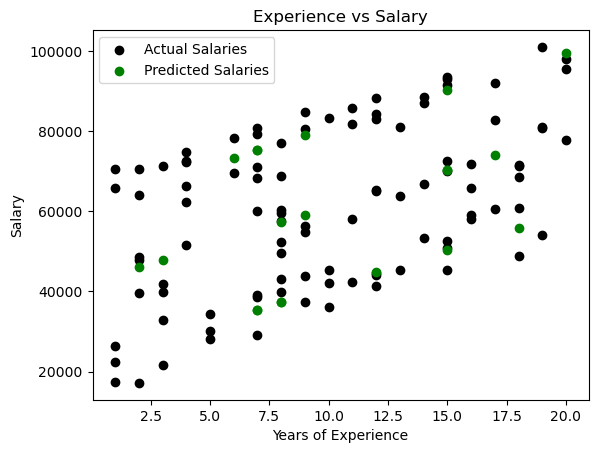

In [36]:
#Create scatter plots to visualize the relationship between experience, education, and salary.
#Plot the model's predictions against the actual salary data.

# Scatter plot for experience vs salary
plt.scatter(df['experience'], df['salary'], color='black', label='Actual Salaries')
plt.scatter(X_test['experience'], y_pred, color='green', label='Predicted Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.legend()
plt.show()